Stimuating Function 1

X Shape torch.Size([300, 1]) 
 y shape torch.Size([300, 1])


<ipython-input-2-5f98b872478a>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)# pytorch operations expect inputs in tensor format


Text(0, 0.5, 'y')

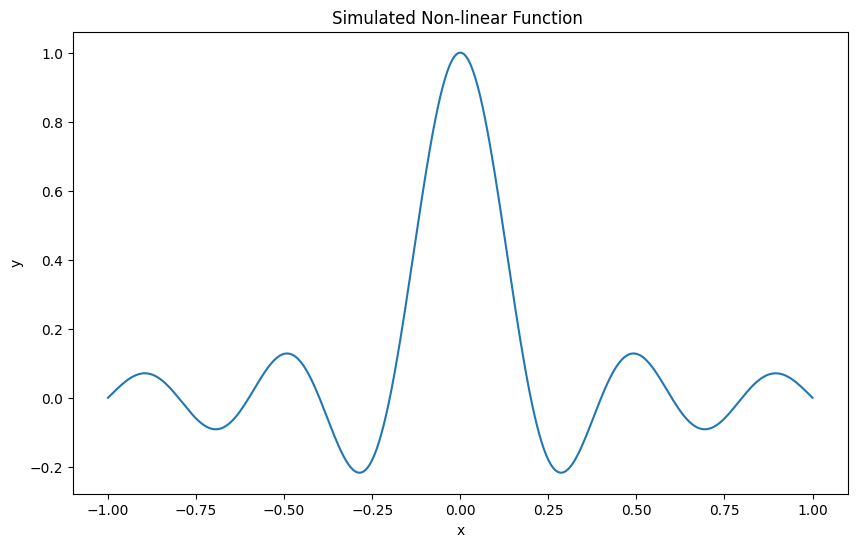

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import math
import gc


# Generate the input data (single input: x)
torch.manual_seed(1)
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)  # 100 equidistant points between -1 and 1

y = (np.sin(5*np.pi*x))/(5*np.pi*x)
print('X Shape',x.shape,"\n y shape",y.shape)
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)# pytorch operations expect inputs in tensor format
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title("Simulated Non-linear Function ")
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
def trainingFunc(model,x,y):
    model.train()
    max_epoch = 25000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())

        if epoch%500 == 0 :
          print(f'epoch: {epoch}, loss = {loss.item():.4f}') #, weight = {model.weight.item()},  bias ={model.bias.item()}')

        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False
        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print(f"Convergeance reached for loss:{loss_arr[-1]:.4f} at epoch: {epoch}")
                not_converged = False

    return epoch_arr,loss_arr,prediction

In [ ]:
def parameter_count(model,i):
    a=[]
    for i in model.parameters():
        a.append(torch.numel(i))
    print('Total no of parameters in Model',i,':', np.sum(a))


In [ ]:
class M1(torch.nn.Module):
    def __init__(self,):
        super(M1, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 5)   # hidden layer
        self.hidden2 = torch.nn.Linear(5, 10)
        self.hidden3 = torch.nn.Linear (10, 10)
        self.hidden4 = torch.nn.Linear (10, 10)
        self.hidden5 = torch.nn.Linear (10, 10)
        self.hidden6 = torch.nn.Linear (10, 10)
        self.hidden7 = torch.nn.Linear (10,5)
        self.predict = torch.nn.Linear(5, 1)   # output layer
        #self.activation = nn.LeakyReLU()

    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      # activation function for hidden layer
        x = F.leaky_relu(self.hidden2(x))
        x = F.leaky_relu(self.hidden3(x))
        x = F.leaky_relu(self.hidden4(x))
        x = F.leaky_relu(self.hidden5(x))
        x = F.leaky_relu(self.hidden6(x))
        x = F.leaky_relu(self.hidden7(x))
        x = self.predict(x)                    # linear output
        return x

model1 = M1()     # define the network
#optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.001, weight_decay = 1e-4)
optimizer = torch.optim.Adam(model1.parameters(), lr=0.0012, weight_decay = 1e-4)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

parameter_count(model1,1)
#Getting weights & bias
#print("\nModel 1 weight and bias before training\n")
#for param in model1.state_dict():
    #print(param, "\t",model1.state_dict()[param])

Total no of parameters in Model Parameter containing:
tensor([0.3165], requires_grad=True) : 571


In [ ]:
Model1_epoch_arr,Model1_loss_arr,Model1_prediction = trainingFunc(model1,x,y)

epoch: 500, loss = 0.0029
epoch: 1000, loss = 0.0025
epoch: 1500, loss = 0.0025
epoch: 2000, loss = 0.0011
Convergeance reached for loss:0.0009 at epoch: 2016


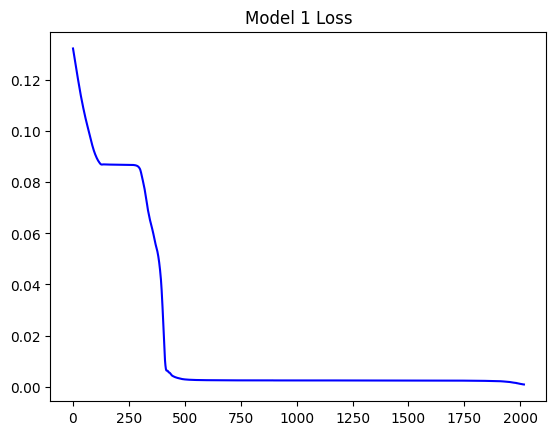

In [ ]:
#plot
plt.plot(Model1_epoch_arr,Model1_loss_arr,color="blue")
plt.title('Model 1 Loss')
plt.show()

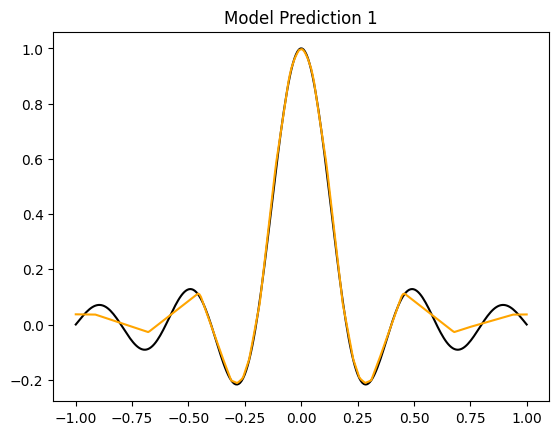

In [ ]:
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,Model1_prediction.data.numpy(),color="orange")
plt.title('Model Prediction 1')
plt.show()

MODEL 2

In [ ]:
class M2(torch.nn.Module):
    def __init__(self,):
        super(M2, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 10)   # hidden layer
        self.hidden2 = torch.nn.Linear (10, 18)
        self.hidden3 = torch.nn.Linear (18, 15)
        self.hidden4 = torch.nn.Linear (15, 4)
        self.predict = torch.nn.Linear(4, 1)   # output layer
        #self.activation = nn.LeakyReLU()

    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      # activation function for hidden layer
        x = F.leaky_relu(self.hidden2(x))
        x = F.leaky_relu(self.hidden3(x))

        x = F.leaky_relu(self.hidden4(x))
        x = self.predict(x)                    # linear output
        return x

model2 = M2()     # define the network
#optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
optimizer = torch.optim.Adam(model2.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

parameter_count(model2,2)




#Getting weights & bias
#print("\nModel 2 weight and bias before training\n")
#for param in model2.state_dict():
#    print(param, "\t",model2.state_dict()[param])

Total no of parameters in Model Parameter containing:
tensor([0.4854], requires_grad=True) : 572


In [ ]:
Model2_epoch_arr,Model2_loss_arr,Model2_prediction = trainingFunc(model2,x,y)

epoch: 500, loss = 0.0040
Convergeance reached for loss:0.0010 at epoch: 862


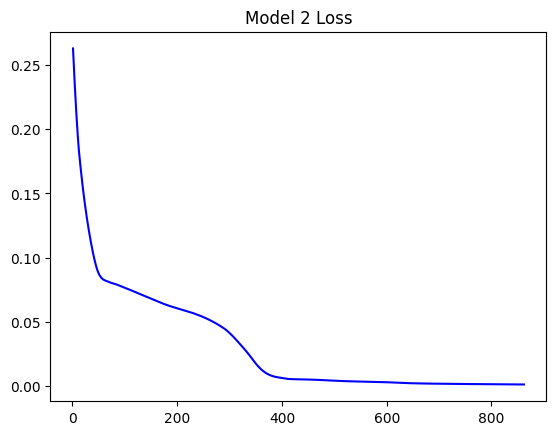

In [ ]:
plt.plot(Model2_epoch_arr,Model2_loss_arr,color="blue")
plt.title('Model 2 Loss')
plt.show()

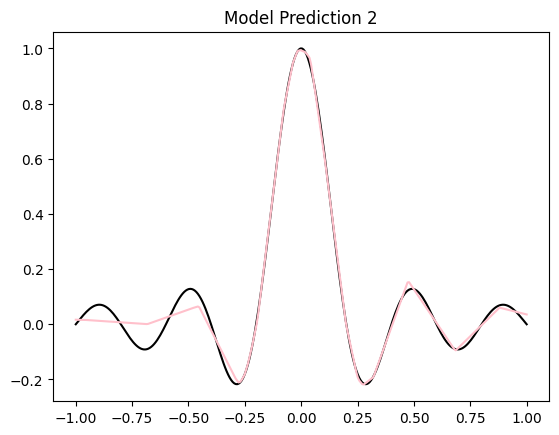

11246

In [ ]:
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,Model2_prediction.data.numpy(),color="pink")
plt.title('Model Prediction 2')
plt.show()
torch.cuda.empty_cache()
gc.collect()

In [ ]:
class M3(torch.nn.Module):
    def __init__(self,):
        super(M3, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 190)   # hidden layer
        self.predict = torch.nn.Linear(190, 1)   # output layer
        #self.activation = nn.LeakyReLU()

    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      # activation function for hidden layer
        x = self.predict(x)                    # linear output
        return x

model3 = M3()    # define the network
#optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
optimizer = torch.optim.Adam(model3.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

parameter_count(model3,3)


#Getting weights & bias
#print("\nModel 3 weight and bias before training\n")
#for param in model3.state_dict():
    #print(param, "\t",model3.state_dict()[param])

Total no of parameters in Model Parameter containing:
tensor([0.0330], requires_grad=True) : 571


In [ ]:
Model3_epoch_arr,Model3_loss_arr,Model3_prediction = trainingFunc(model3,x,y)

epoch: 500, loss = 0.0096
epoch: 1000, loss = 0.0044
epoch: 1500, loss = 0.0021
epoch: 2000, loss = 0.0012
Convergeance reached for loss:0.0010 at epoch: 2182


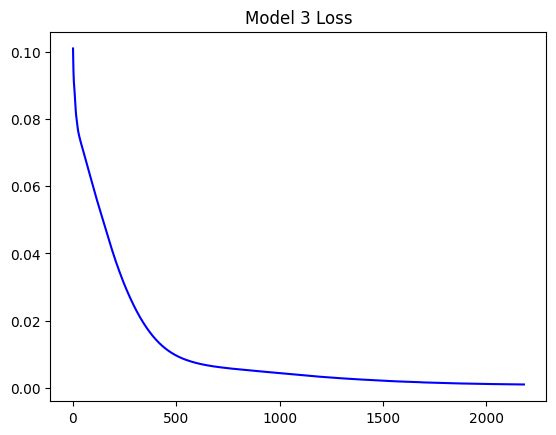

In [ ]:
plt.plot(Model3_epoch_arr,Model3_loss_arr,color="blue")
plt.title('Model 3 Loss')
plt.show()

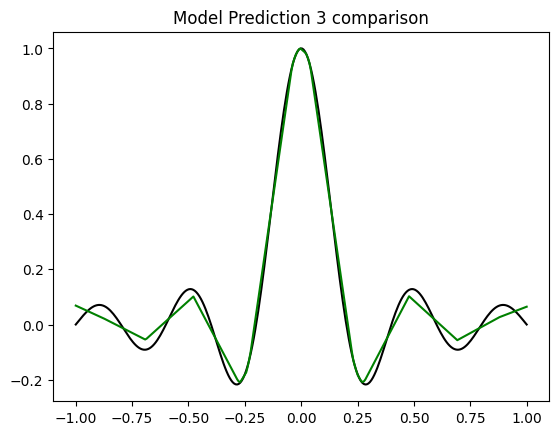

3842

In [ ]:
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,Model3_prediction.data.numpy(),color="green")
plt.title('Model Prediction 3 comparison')
plt.show()
torch.cuda.empty_cache()
gc.collect()

Comapring all the three Models' Losses and Predictions in One plot

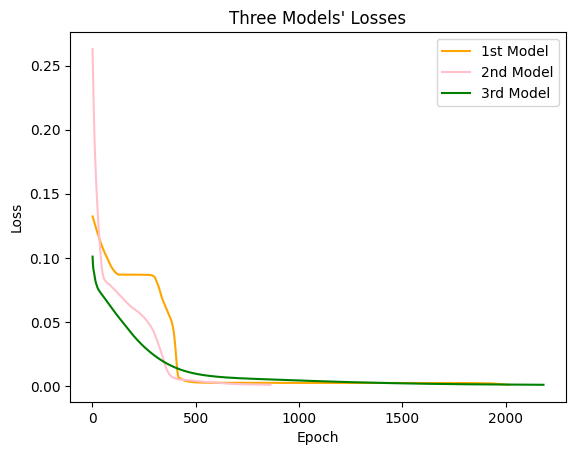

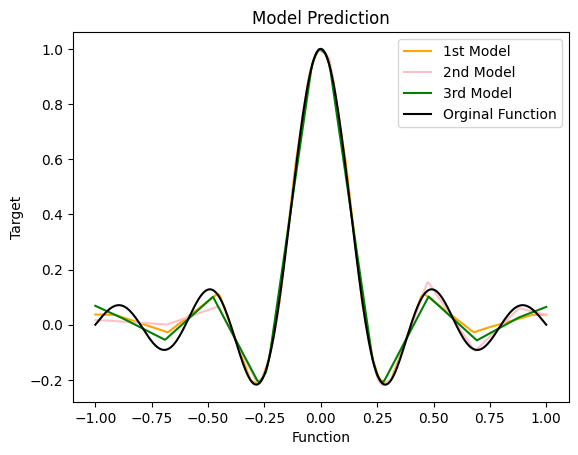

In [ ]:

plt.plot(Model1_epoch_arr,Model1_loss_arr, color = "orange")
plt.plot(Model2_epoch_arr,Model2_loss_arr, color = "pink")
plt.plot(Model3_epoch_arr,Model3_loss_arr, color = "green")
plt.title("Three Models' Losses")
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLossFunc1.pdf')
plt.show()


plt.plot(x,Model1_prediction.data.numpy(),color="orange")
plt.plot(x,Model2_prediction.data.numpy(),color="pink")
plt.plot(x,Model3_prediction.data.numpy(),color="green")
plt.plot(x,y.numpy(),color="black")
plt.title('Model Prediction')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Function'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('Model_PredictionFunc1.pdf')
plt.show()

## **FUNCTION 2**

Xshape: torch.Size([300, 1]) 
 Yshape: torch.Size([300, 1])


<ipython-input-18-1a441f920765>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x2, y2 = torch.tensor(x2, dtype=torch.float32), torch.tensor(y2, dtype=torch.float32)


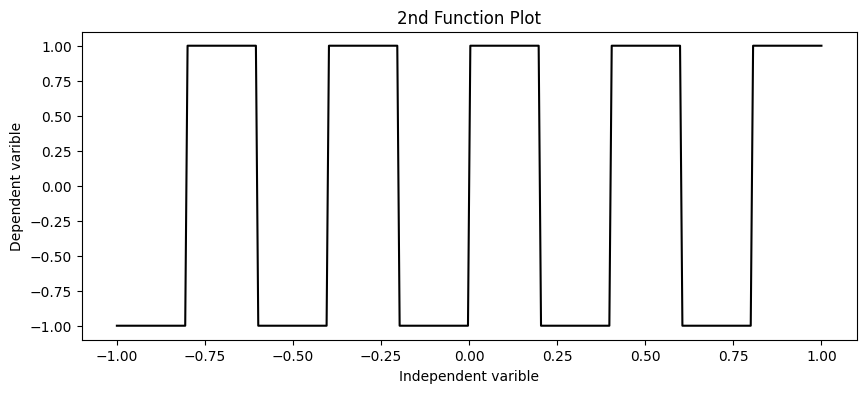

In [ ]:
torch.manual_seed(1)
x2 = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)  # x data (tensor), shape=(300, 1)
y2 = np.sign(np.sin(5*np.pi*x)) #non-linear y function
#y = (np.cos(7 * x * np.pi))

print('Xshape:',x.shape,"\n Yshape:",y.shape)

#x, y = Variable(x), Variable(y) #converting data into variables as pytorch requirments
x2, y2 = torch.tensor(x2, dtype=torch.float32), torch.tensor(y2, dtype=torch.float32)

plt.figure(figsize=(10,4))
plt.plot(x2, y2, color = "black")
plt.title('2nd Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('funcplt.png')

plt.show()

n_samples, n_features = x2.shape

### Creating another set of instances on the previouly defined models and train them

 *Model 1*

In [ ]:
m12 = M1() # define the network and move to GPU
optimizer = torch.optim.Adam(m12.parameters(), lr=0.01, weight_decay=1e-4)
loss_func = torch.nn.MSELoss()
parameter_count(m12,1)


Total no of parameters in Model Parameter containing:
tensor([0.3496], requires_grad=True) : 571


In [ ]:
M12_epoch_arr,M12_loss_arr,M12_prediction = trainingFunc(m12,x2,y2)

epoch: 500, loss = 0.1291
epoch: 1000, loss = 0.0467
epoch: 1500, loss = 0.1090
epoch: 2000, loss = 0.0629
epoch: 2500, loss = 0.0334
epoch: 3000, loss = 0.0334
epoch: 3500, loss = 0.0245
epoch: 4000, loss = 0.0502
epoch: 4500, loss = 0.0623
epoch: 5000, loss = 0.0547
epoch: 5500, loss = 0.0073
epoch: 6000, loss = 0.0393
epoch: 6500, loss = 0.0532
epoch: 7000, loss = 0.0474
epoch: 7500, loss = 0.0017
Convergeance reached for loss:0.0010 at epoch: 7619


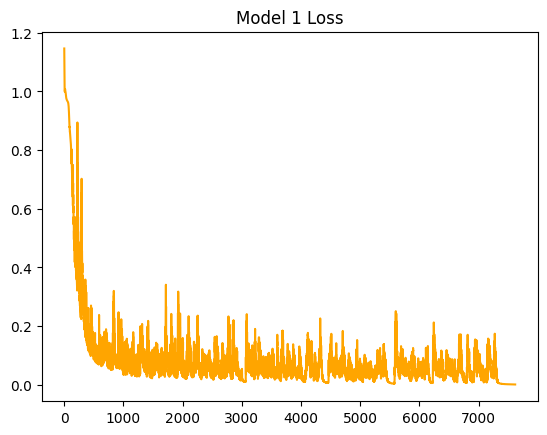

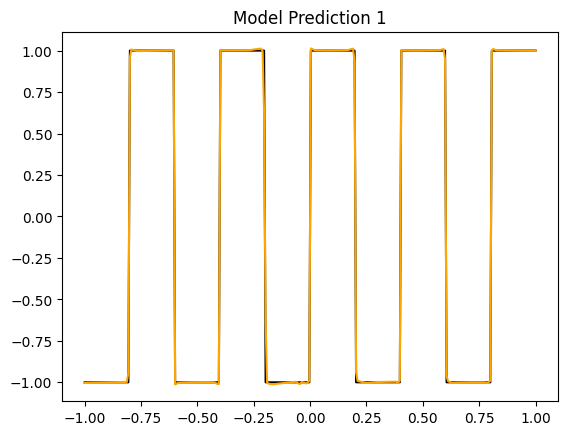

In [ ]:
plt.plot(M12_epoch_arr,M12_loss_arr,color="orange")
plt.title('Model 1 Loss')
plt.show()
plt.plot(x2.numpy(),y2.numpy(),color="black")
plt.plot(x2,M12_prediction.data.numpy(),color="orange")
plt.title('Model Prediction 1')
plt.show()

In [ ]:
m22 = M2() # define the network and move to GPU
optimizer = torch.optim.Adam(m22.parameters(), lr=0.001, weight_decay=1e-4)
loss_func = torch.nn.MSELoss()
parameter_count(m22,2)


Total no of parameters in Model Parameter containing:
tensor([0.4315], requires_grad=True) : 572


In [ ]:
M22_epoch_arr,M22_loss_arr,M22_prediction = trainingFunc(m22,x2,y2)

epoch: 500, loss = 0.7742
epoch: 1000, loss = 0.3307
epoch: 1500, loss = 0.1276
epoch: 2000, loss = 0.1079
epoch: 2500, loss = 0.0955
epoch: 3000, loss = 0.0858
epoch: 3500, loss = 0.0792
epoch: 4000, loss = 0.0735
epoch: 4500, loss = 0.0690
epoch: 5000, loss = 0.0669
epoch: 5500, loss = 0.0630
epoch: 6000, loss = 0.0609
epoch: 6500, loss = 0.0584
epoch: 7000, loss = 0.0571
epoch: 7500, loss = 0.0554
epoch: 8000, loss = 0.0559
epoch: 8500, loss = 0.0538
epoch: 9000, loss = 0.0533
epoch: 9500, loss = 0.0515
epoch: 10000, loss = 0.0508
epoch: 10500, loss = 0.0545
epoch: 11000, loss = 0.0495
epoch: 11500, loss = 0.0517
epoch: 12000, loss = 0.0492
epoch: 12500, loss = 0.0493
epoch: 13000, loss = 0.0481
epoch: 13500, loss = 0.0469
epoch: 14000, loss = 0.0488
epoch: 14500, loss = 0.0468
epoch: 15000, loss = 0.0473
epoch: 15500, loss = 0.0455
epoch: 16000, loss = 0.0454
epoch: 16500, loss = 0.0453
epoch: 17000, loss = 0.0465
epoch: 17500, loss = 0.0436
epoch: 18000, loss = 0.0447
epoch: 18500

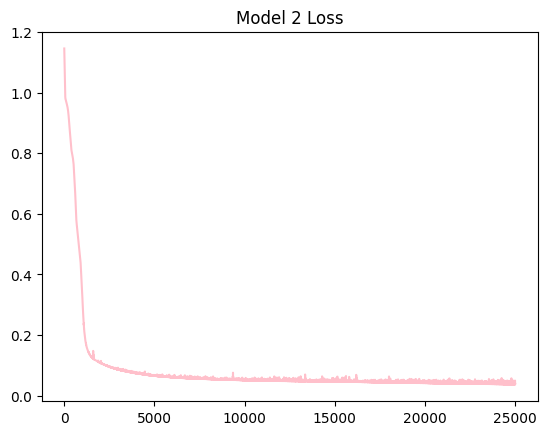

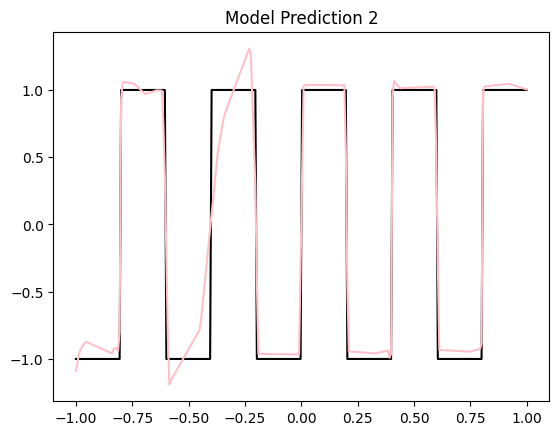

In [ ]:
plt.plot(M22_epoch_arr,M22_loss_arr,color="pink")
plt.title('Model 2 Loss')
plt.show()
plt.plot(x2.numpy(),y2.numpy(),color="black")
plt.plot(x2,M22_prediction.data.numpy(),color="pink")
plt.title('Model Prediction 2')
plt.show()

Total no of parameters in Model Parameter containing:
tensor([0.0719], requires_grad=True) : 571
epoch: 500, loss = 0.8002
epoch: 1000, loss = 0.6476
epoch: 1500, loss = 0.4106
epoch: 2000, loss = 0.2974
epoch: 2500, loss = 0.2518
epoch: 3000, loss = 0.2287
epoch: 3500, loss = 0.2124
epoch: 4000, loss = 0.2008
epoch: 4500, loss = 0.1923
epoch: 5000, loss = 0.1861
epoch: 5500, loss = 0.1810
epoch: 6000, loss = 0.1769
epoch: 6500, loss = 0.1736
epoch: 7000, loss = 0.1708
epoch: 7500, loss = 0.1663
epoch: 8000, loss = 0.1610
epoch: 8500, loss = 0.1583
epoch: 9000, loss = 0.1555
epoch: 9500, loss = 0.1533
epoch: 10000, loss = 0.1514
epoch: 10500, loss = 0.1496
epoch: 11000, loss = 0.1481
epoch: 11500, loss = 0.1467
epoch: 12000, loss = 0.1455
epoch: 12500, loss = 0.1443
epoch: 13000, loss = 0.1432
epoch: 13500, loss = 0.1422
epoch: 14000, loss = 0.1412
epoch: 14500, loss = 0.1404
epoch: 15000, loss = 0.1400
epoch: 15500, loss = 0.1394
epoch: 16000, loss = 0.1381
epoch: 16500, loss = 0.1373

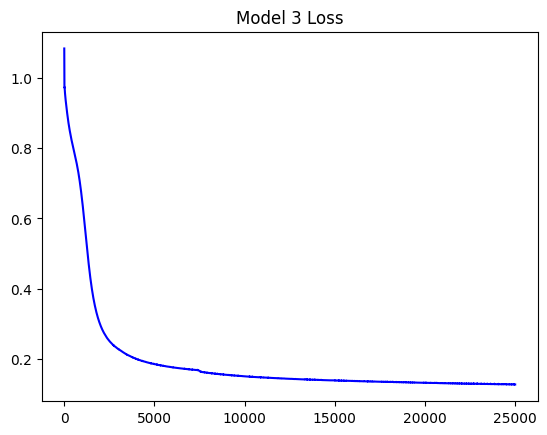

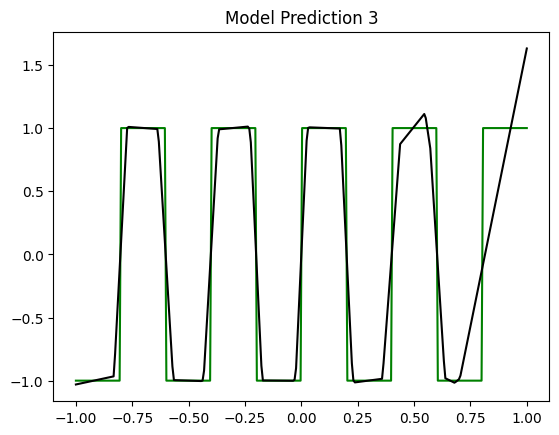

In [ ]:
m3 = M3()     # define the network
optimizer = torch.optim.Adam(m3.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() # this is for regression mean squared loss
parameter_count(m3,3)
#model_weight(m3,1,3)
M32_epoch_arr,M32_loss_arr,M32_prediction = trainingFunc(m3,x2,y2)
#model_weight(m3,0,3)
#plot
plt.plot(M32_epoch_arr,M32_loss_arr,color="blue")
plt.title('Model 3 Loss')
plt.show()
#plot
plt.plot(x2.numpy(),y2.numpy(),color="green")
plt.plot(x2,M32_prediction.data.numpy(),color="black")
plt.title('Model Prediction 3')
plt.show()

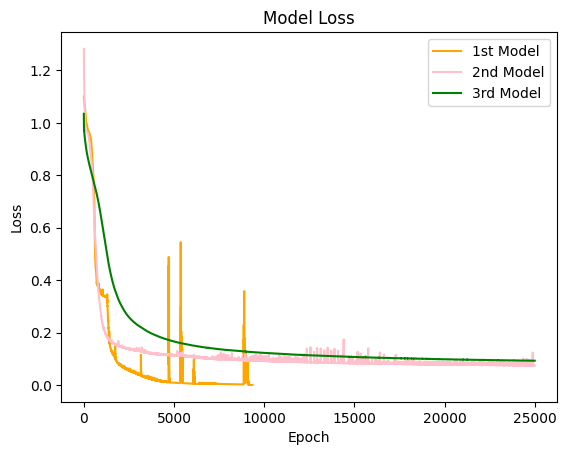

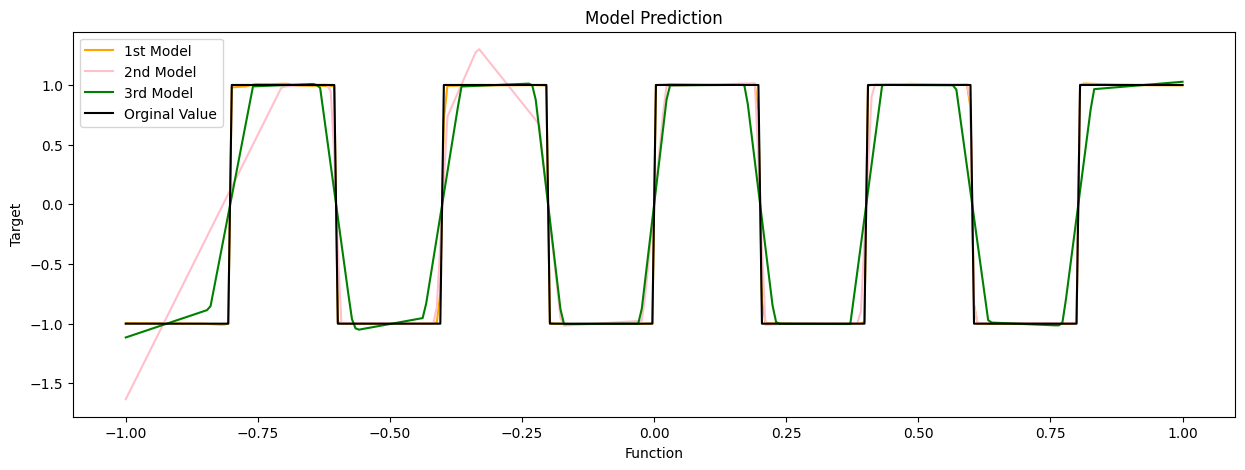

In [ ]:

plt.plot(M12_epoch_arr,M12_loss_arr, color = "orange")
plt.plot(M22_epoch_arr,M22_loss_arr, color = "pink")
plt.plot(M32_epoch_arr,M32_loss_arr, color = "green")
plt.title('Model Loss')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLoss2.pdf')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(x2,M12_prediction.data.numpy(),color="orange")
plt.plot(x2,M22_prediction.data.numpy(),color="pink")
plt.plot(x2,M32_prediction.data.numpy(),color="green")
plt.plot(x2,y2.numpy(),color="black")
plt.title('Model Prediction')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'],loc='best')
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('Model_Prediction2.pdf')
plt.show()